In [235]:
import pandas as pd
import numpy as np
import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.dates as mdates
import seaborn as sns; sns.set()

%matplotlib notebook
%matplotlib notebook

In [241]:
# Read datafile
df = pd.read_csv("../anomalies_in_max_out-2.csv", delimiter='\t')
df['str_time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
# sort dataset by time
df = df.sort_values(by=['str_time'])

<IPython.core.display.Javascript object>


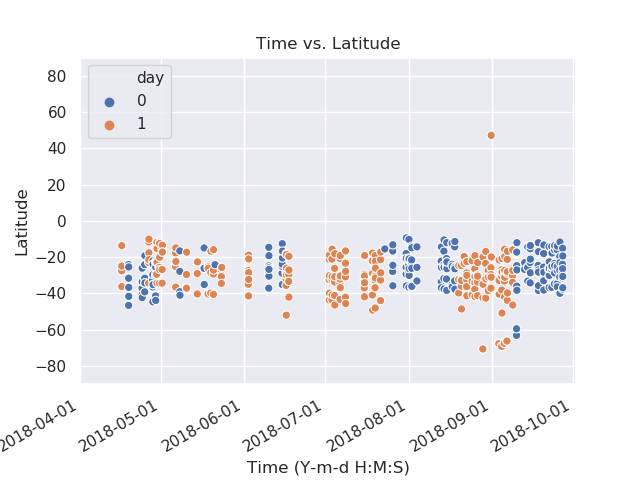

In [246]:
# Plot time vs latitude
# time column as datetime
#set x axis format
plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#plot
axis = sns.scatterplot(x="str_time", y="Lat", hue="day", data=df)

# beautify the x-labels and set x axis range
plt.gcf().autofmt_xdate()
plt.xlim('2018-04-01 00:00:00', '2018-10-01 23:59:00')

# set y axis range and grid
plt.ylim((-90, 90))

# set labels and title
plt.xlabel("Time (Y-m-d H:M:S)")
plt.ylabel("Latitude")
plt.title("Time vs. Latitude")
    
plt.show()

<IPython.core.display.Javascript object>


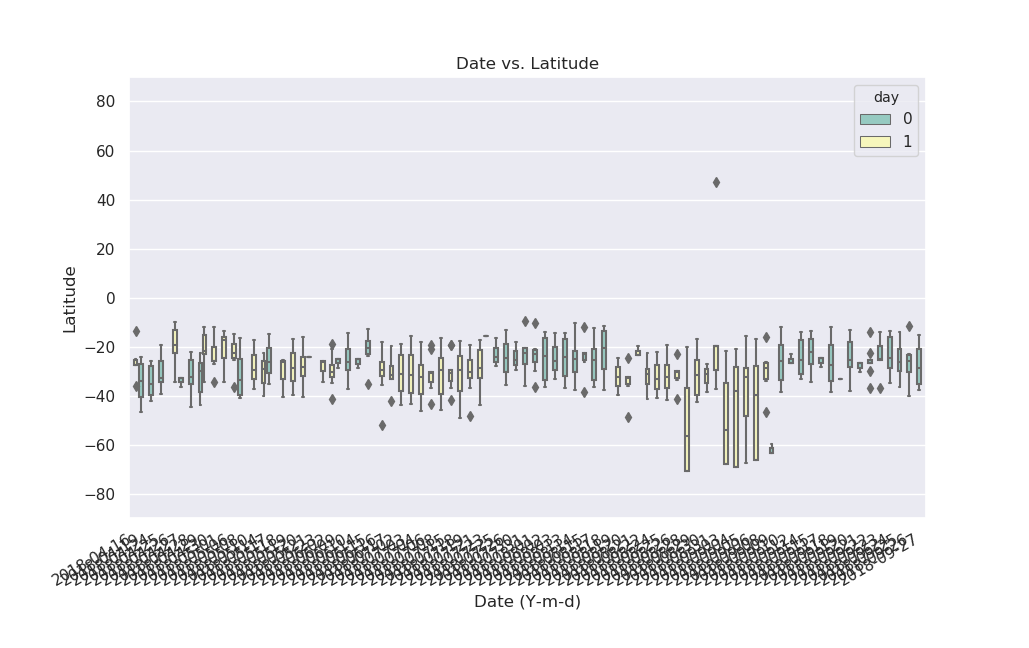

In [253]:
#get date from time column
date = df['str_time'].dt.date

#set date as a df column
df['date'] = date

#change figure dimensions
a4_dims = (14.7*0.7, 9.27*0.7)
fig, ax = plt.subplots(figsize=a4_dims)

#set x axis format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax = sns.boxplot(x="date", y="Lat", hue="day", data=df, palette="Set3")
                                                         
# beautify the x-labels and set x axis range
plt.gcf().autofmt_xdate()
#plt.xlim('2018-04-01', '2018-10-01')

# set y axis range and grid
plt.ylim((-90, 90))

# set labels and title
plt.xlabel("Date (Y-m-d)")
plt.ylabel("Latitude")
plt.title("Date vs. Latitude")
    
plt.show()

<IPython.core.display.Javascript object>


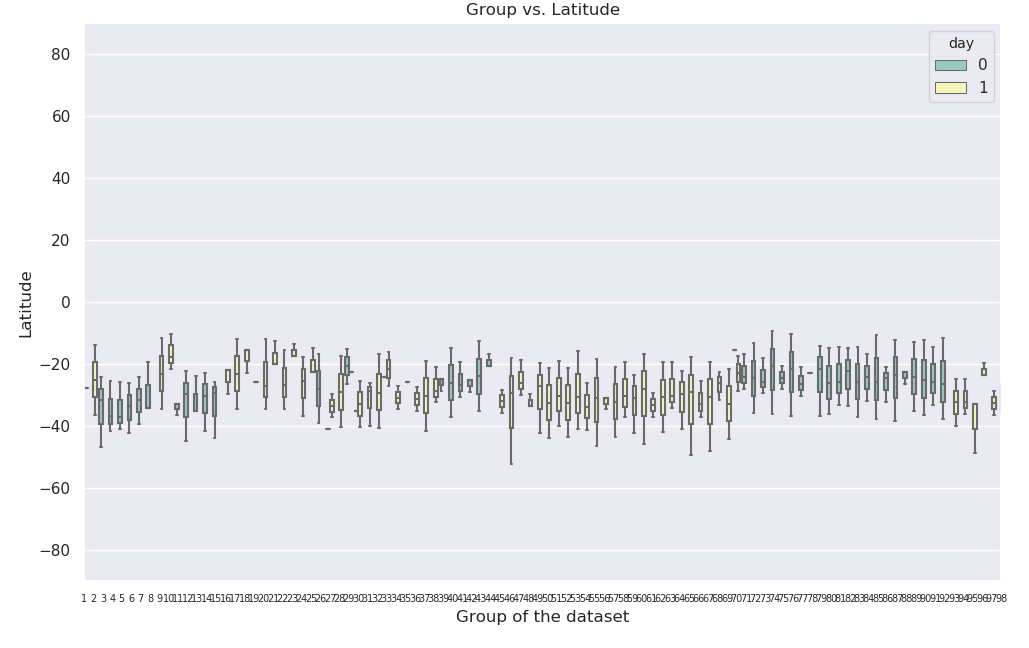

In [254]:
#boxplot de los distintos grupos
# sort dataset by time
df = df.sort_values(by=['time'])

#change figure dimensions
a4_dims = (14.7*0.7, 9.27*0.7)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.boxplot(x="group", y="Lat", hue="day", data=df, palette="Set3")
                                                         
# beautify the x-labels and set x axis range
#plt.gcf().autofmt_xdate()
plt.xlim(0, 97)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)

# set y axis range and grid
plt.ylim((-90, 90))

# set labels and title
plt.xlabel("Group of the dataset")
plt.ylabel("Latitude")
plt.title("Group vs. Latitude")
    
plt.show()

# Testing matplotlib errorbar

In [222]:
# Read datafile
df = pd.read_csv("../anomalies_in_max_out.csv", delimiter='\t')
df['str_time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
# sort dataset by time
df = df.sort_values(by=['str_time'])

In [223]:
df = df.sort_values(by=['time'])
#df

In [224]:
means = df.groupby("group").Lat.mean()
ranges = df.groupby("group").apply(lambda x: x.Lat.max()-x.Lat.min())
vmaxs = df.groupby("group").nth(1)

<IPython.core.display.Javascript object>


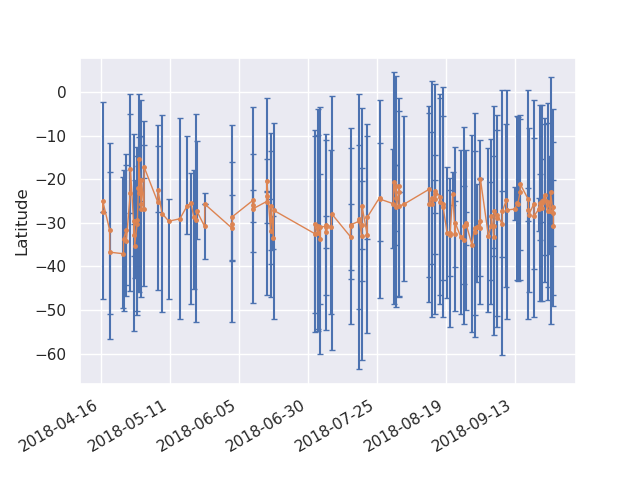

In [226]:
# beautify the x-labels and set x axis range
time = mdates.date2num(vmaxs.str_time.tolist())
plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.errorbar(time, means.tolist(), yerr=ranges.tolist(), marker='', linestyle='', capsize=2)
plt.plot(time, vmaxs.Lat, '.-', linewidth=1, markersize=5)
plt.gcf().autofmt_xdate()
plt.ylabel("Latitude")
plt.show()

In [83]:
df["time"].tolist()

[Timestamp('2018-04-16 10:28:56'),
 Timestamp('2018-04-16 10:28:56'),
 Timestamp('2018-04-16 10:28:56'),
 Timestamp('2018-04-16 11:59:56'),
 Timestamp('2018-04-16 12:02:56'),
 Timestamp('2018-04-16 12:05:56'),
 Timestamp('2018-04-19 00:29:14'),
 Timestamp('2018-04-19 00:33:14'),
 Timestamp('2018-04-19 00:35:14'),
 Timestamp('2018-04-19 02:05:15'),
 Timestamp('2018-04-19 02:06:34'),
 Timestamp('2018-04-19 02:09:34'),
 Timestamp('2018-04-24 00:26:43'),
 Timestamp('2018-04-24 00:27:43'),
 Timestamp('2018-04-24 00:30:43'),
 Timestamp('2018-04-24 02:01:00'),
 Timestamp('2018-04-24 02:03:19'),
 Timestamp('2018-04-24 02:05:19'),
 Timestamp('2018-04-25 00:07:24'),
 Timestamp('2018-04-25 00:09:24'),
 Timestamp('2018-04-25 00:11:24'),
 Timestamp('2018-04-25 01:43:24'),
 Timestamp('2018-04-25 01:43:24'),
 Timestamp('2018-04-25 01:47:24'),
 Timestamp('2018-04-26 11:51:16'),
 Timestamp('2018-04-26 11:54:17'),
 Timestamp('2018-04-26 11:57:17'),
 Timestamp('2018-04-26 13:25:32'),
 Timestamp('2018-04-

In [227]:
df["month"] = df["str_time"].dt.strftime('%m')
df["week"] = df["str_time"].dt.strftime('%W')

In [228]:
g = df.groupby("week")

In [229]:
ranges = g.apply(lambda x: x.Lat.max()-x.Lat.min())
means = g.apply(lambda x: (x.Lat.max()+x.Lat.min())/2)
vmaxs = g.apply(lambda x: x.Lat[x["Particles counter"].idxmax()])
index = vmaxs.index

<IPython.core.display.Javascript object>


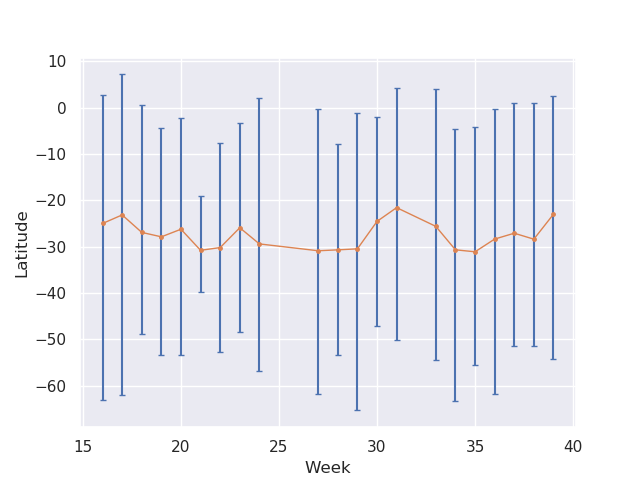

In [231]:
# beautify the x-labels and set x axis range
plt.figure()
plt.errorbar([int(i) for i in index], means, yerr=ranges, marker='', linestyle='', capsize=2)
plt.plot([int(i) for i in index], vmaxs, '.-', linewidth=1, markersize=5)
plt.ylabel("Latitude")
plt.xlabel("Week")
plt.show()

In [232]:
gm = df.groupby("month")

In [233]:
ranges = gm.apply(lambda x: x.Lat.max()-x.Lat.min())
means = gm.apply(lambda x: (x.Lat.max()+x.Lat.min())/2)
vmaxs = gm.apply(lambda x: x.Lat[x["Particles counter"].idxmax()])
index = vmaxs.index

<IPython.core.display.Javascript object>


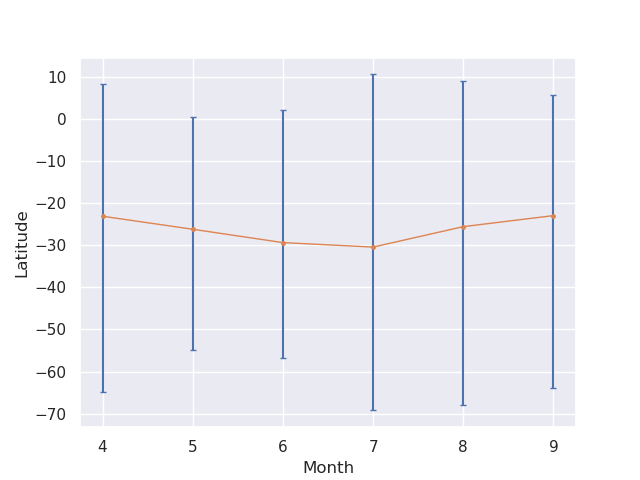

In [234]:
# beautify the x-labels and set x axis range
plt.figure()
plt.errorbar([int(i) for i in index], means, yerr=ranges, marker='', linestyle='', capsize=2)
plt.plot([int(i) for i in index], vmaxs, '.-', linewidth=1, markersize=5)
plt.ylabel("Latitude")
plt.xlabel("Month")
plt.show()